데이터 확인 및 검증셋

In [1]:
import pandas as pd

In [2]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [3]:
df = pd.read_csv('./data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


와인 종류 예측

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [5]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/50
8/8 [==============================] - 1s 46ms/step - loss: 0.3715 - accuracy: 0.7821 - val_loss: 0.3509 - val_accuracy: 0.8146
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3091 - accuracy: 0.8684 - val_loss: 0.2846 - val_accuracy: 0.9054
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2540 - accuracy: 0.9207 - val_loss: 0.2605 - val_accuracy: 0.9115
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2327 - accuracy: 0.9276 - val_loss: 0.2523 - val_accuracy: 0.9108
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2269 - accuracy: 0.9264 - val_loss: 0.2434 - val_accuracy: 0.9169
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 0.2210 - accuracy: 0.9279 - val_loss: 0.2407 - val_accuracy: 0.9154
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.2167 - accuracy: 0.9284 - val_loss: 0.2376 - val_accuracy: 0.9177
Epoch 8/50
8/8 [===============

모델 업데이트하기

In [9]:
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy: .4f}.hdf5"

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])


Epoch 1: saving model to ./data/model/all/01- 0.9662.hdf5

Epoch 2: saving model to ./data/model/all/02- 0.9685.hdf5

Epoch 3: saving model to ./data/model/all/03- 0.9677.hdf5

Epoch 4: saving model to ./data/model/all/04- 0.9685.hdf5

Epoch 5: saving model to ./data/model/all/05- 0.9615.hdf5

Epoch 6: saving model to ./data/model/all/06- 0.9662.hdf5

Epoch 7: saving model to ./data/model/all/07- 0.9708.hdf5

Epoch 8: saving model to ./data/model/all/08- 0.9646.hdf5

Epoch 9: saving model to ./data/model/all/09- 0.9646.hdf5

Epoch 10: saving model to ./data/model/all/10- 0.9654.hdf5

Epoch 11: saving model to ./data/model/all/11- 0.9546.hdf5

Epoch 12: saving model to ./data/model/all/12- 0.9554.hdf5

Epoch 13: saving model to ./data/model/all/13- 0.9554.hdf5

Epoch 14: saving model to ./data/model/all/14- 0.9569.hdf5

Epoch 15: saving model to ./data/model/all/15- 0.9600.hdf5

Epoch 16: saving model to ./data/model/all/16- 0.9600.hdf5

Epoch 17: saving model to ./data/model/all/17- 0

그래프로 과적합 확인하기

In [12]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0716 - accuracy: 0.9779 - val_loss: 0.0710 - val_accuracy: 0.9746
Epoch 2/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9769 - val_loss: 0.0679 - val_accuracy: 0.9762
Epoch 3/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0731 - accuracy: 0.9772 - val_loss: 0.0678 - val_accuracy: 0.9769
Epoch 4/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0712 - accuracy: 0.9774 - val_loss: 0.0724 - val_accuracy: 0.9723
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0727 - accuracy: 0.9761 - val_loss: 0.0791 - val_accuracy: 0.9677
Epoch 6/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0732 - accuracy: 0.9774 - val_loss: 0.0757 - val_accuracy: 0.9731
Epoch 7/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9751 - val_loss: 0.0669 - val_accuracy: 0.9762
Epoch 8/2000
8/8 [

In [13]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.071622,0.977932,0.071001,0.974615
1,0.071910,0.976905,0.067938,0.976154
2,0.073089,0.977162,0.067803,0.976923
3,0.071188,0.977419,0.072448,0.972308
4,0.072692,0.976135,0.079110,0.967692
...,...,...,...,...
1995,0.021664,0.994868,0.060004,0.983846
1996,0.022246,0.995638,0.057277,0.986154
1997,0.021451,0.994868,0.058265,0.988462
1998,0.022084,0.994868,0.057370,0.988462


In [14]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

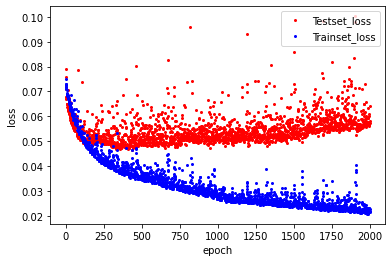

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label="Testset_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

학습의 자동중단

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor="val_loss", patience=20)

In [17]:
modelpath = "./data/model/Ch14-4-bestmodel.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [18]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, 
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0219 - accuracy: 0.9949 - val_loss: 0.0573 - val_accuracy: 0.9877
Epoch 2/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0263 - accuracy: 0.9936 - val_loss: 0.0585 - val_accuracy: 0.9885
Epoch 3/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0623 - val_accuracy: 0.9846
Epoch 4/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.9938 - val_loss: 0.0615 - val_accuracy: 0.9862
Epoch 5/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0213 - accuracy: 0.9956 - val_loss: 0.0573 - val_accuracy: 0.9877
Epoch 6/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 0.9951 - val_loss: 0.0593 - val_accuracy: 0.9838
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.9949 - val_loss: 0.0563 - val_accuracy: 0.9885
Epoch 8/2000
8/8 [=

In [19]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9885
Test accuracy: 0.9884615540504456
